# Детектирование объектов на изображении

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

## Загрузка изображения 

In [2]:
!wget https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cv/screencast_1/friends_m.jpg

--2021-07-28 21:19:18--  https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cv/screencast_1/friends_m.jpg
Resolving raw.githubusercontent.com... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355450 (347K) [image/jpeg]
Saving to: 'friends_m.jpg.2'

friends_m.jpg.2     100%[===================>] 347.12K  1.10MB/s    in 0.3s    

2021-07-28 21:19:19 (1.10 MB/s) - 'friends_m.jpg.2' saved [355450/355450]



## Чтение изображения

In [3]:
img_path = "friends_m.jpg"

In [4]:
from PIL import Image
img = Image.open(img_path)

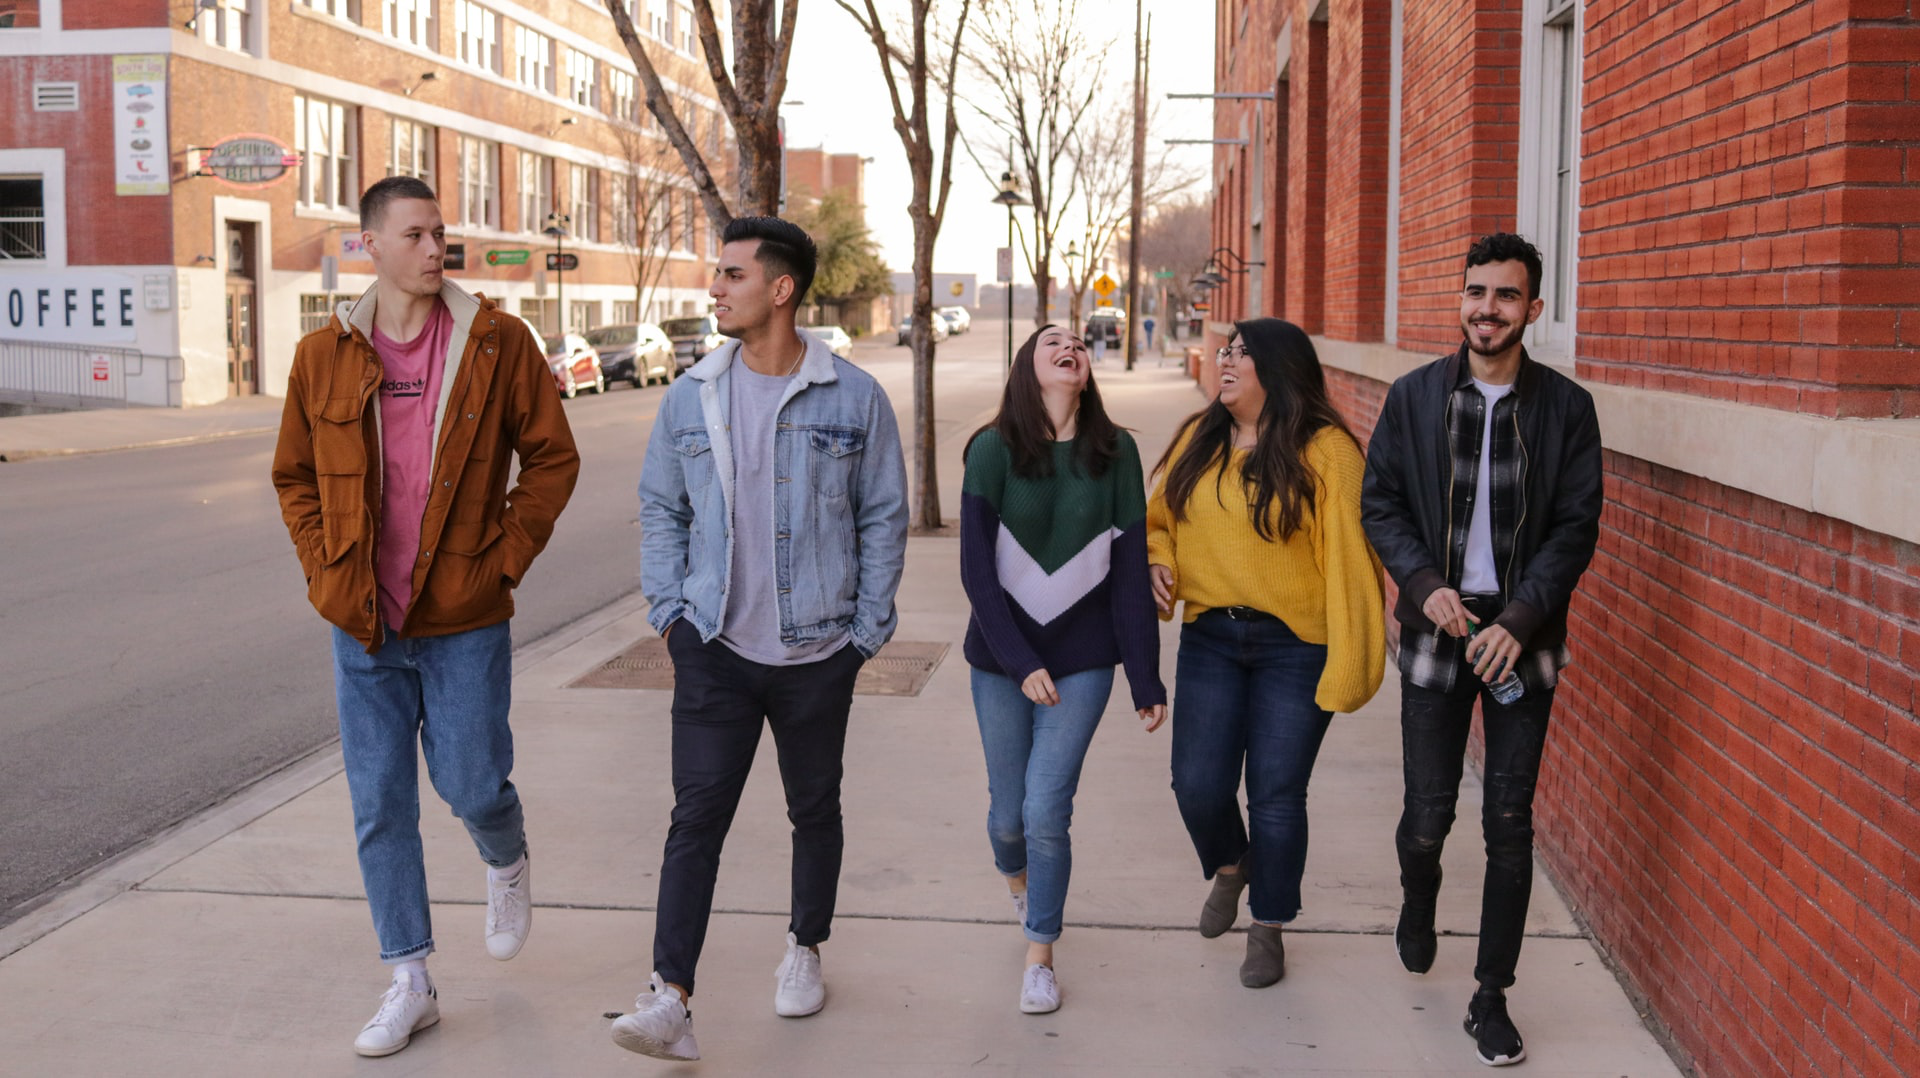

In [5]:
img

## Загрузка Faster R-CNN модели

Модель Faster R-CNN обучена на наборе данных COCO (https://cocodataset.org/#home)

In [6]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval() # будем только применять, дообучать не будем

Классы объектов, которые умеет находить эта модель:

In [7]:
COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 
                                'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 
                                'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 
                                'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 
                                'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 
                                'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 
                                'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 
                                'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
                                'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 
                                'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 
                                'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 
                                'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 
                                'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
                                'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
                                'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 
                                'toothbrush']

## Подготовка изображения

Размер входного изображения может быть любым. Но его надо преобразовать в тензор.

In [8]:
import torchvision.transforms as T

transform = T.Compose([T.ToTensor()])
img = transform(img)

## Детектирование объектов

In [9]:
pred = model([img])

/Users/mikhail/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
pred

[{'boxes': tensor([[ 621.0502,  215.2170,  909.7327, 1040.9088],
          [ 270.9887,  178.7057,  591.1765, 1050.4728],
          [1359.3809,  243.7204, 1609.0934, 1045.2386],
          [1144.9128,  309.8087, 1391.1244,  995.8555],
          [ 956.9460,  320.7476, 1168.2513, 1012.4776],
          [ 584.5434,  320.9375,  677.6396,  390.4099],
          [ 539.8508,  330.4833,  602.6522,  397.4189],
          [ 896.5061,  307.1869,  966.2527,  344.7388],
          [ 934.6849,  305.5364,  970.9344,  338.8111],
          [ 809.3604,  325.6468,  854.1210,  355.0085],
          [ 661.4578,  315.1036,  718.1243,  367.3319],
          [1083.4185,  309.5750, 1125.5632,  347.9585],
          [1452.2054,  387.3307, 1499.0569,  603.9729],
          [1307.5387,  431.1308, 1390.8431,  725.3702],
          [1157.6062,  266.5653, 1170.3198,  281.9886],
          [ 669.8764,  330.5881,  714.0254,  374.2144],
          [ 896.4021,  315.4043,  913.9373,  344.6093],
          [ 546.0409,  253.6739,  577.9

## Постобработка предсказаний

По предсказанным меткам классов найдем из названия

In [11]:
pred_class = np.array([COCO_INSTANCE_CATEGORY_NAMES[i] for i in pred[0]['labels'].numpy()])
print(pred_class)

['person' 'person' 'person' 'person' 'person' 'car' 'car' 'car' 'car'
 'car' 'car' 'car' 'tie' 'handbag' 'traffic light' 'car' 'car'
 'traffic light' 'car' 'car' 'person' 'tie' 'car' 'traffic light'
 'traffic light' 'backpack' 'truck' 'car' 'car' 'traffic light'
 'cell phone' 'traffic light' 'person' 'car' 'traffic light' 'bottle'
 'umbrella' 'traffic light' 'handbag' 'car' 'backpack' 'bench' 'car'
 'person']


`scores` выражает уверенность модели в том, что объект пренадлежит предсказанному классу

In [12]:
pred_score = pred[0]['scores'].detach().numpy()
print(pred_score)

[0.99983084 0.9998229  0.99977714 0.99965036 0.9995778  0.9903437
 0.9760316  0.953684   0.9522223  0.9169463  0.91214323 0.8948725
 0.78825027 0.6137353  0.501688   0.39117944 0.38170823 0.3480307
 0.27404797 0.26227987 0.23200214 0.2140685  0.20737785 0.17490488
 0.16081207 0.15444386 0.13783638 0.11381023 0.10965006 0.10016507
 0.09430352 0.08286231 0.07232634 0.07018442 0.06605609 0.06603902
 0.06567635 0.06544457 0.06222923 0.05935615 0.0563736  0.05602239
 0.05344041 0.05252214]


Координаты прямоугольников переведем в другой формат

In [13]:
pred_boxes = []
for i in pred[0]['boxes'].detach().numpy():
    point1 = (i[0], i[1])
    point2 = (i[2], i[3])
    pred_boxes.append([point1, point2])
pred_boxes = np.array(pred_boxes, dtype=np.int)

Оставим только те объекты, для которых `score > threshold`

In [14]:
threshold = 0.5

pred_boxes = pred_boxes[pred_score > threshold]
pred_class = pred_class[pred_score > threshold]

In [15]:
print(pred_class)

['person' 'person' 'person' 'person' 'person' 'car' 'car' 'car' 'car'
 'car' 'car' 'car' 'tie' 'handbag' 'traffic light']


## Отображение предсказаний

In [16]:
import cv2

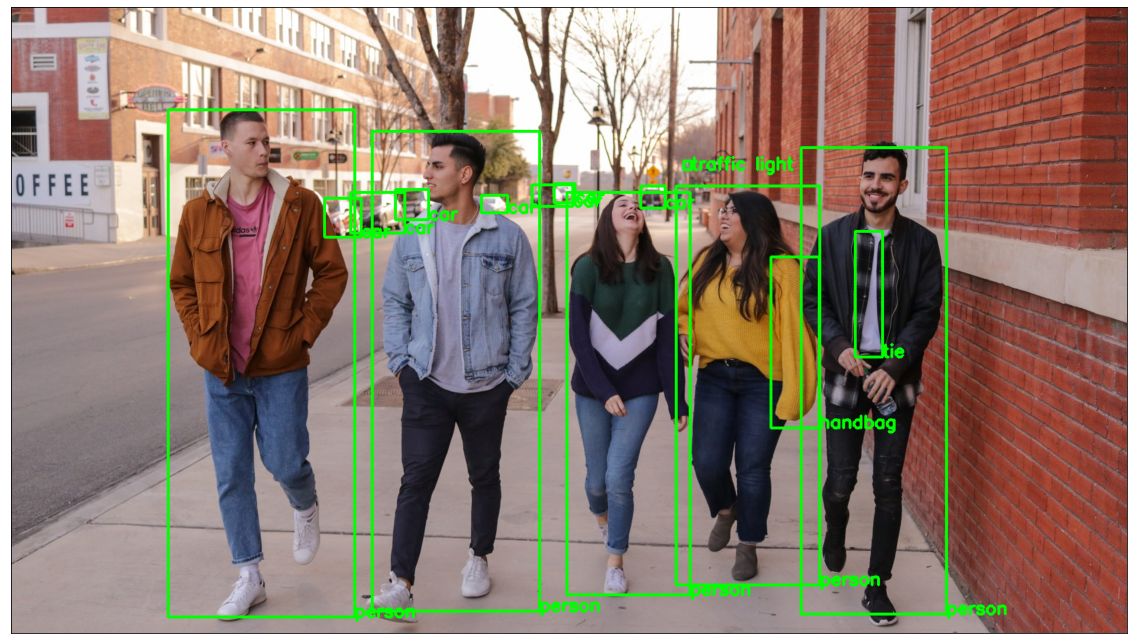

In [17]:
img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

for label, box in zip(pred_class, pred_boxes): 
    # рисуем границы объектов
    cv2.rectangle(img, 
                  (box[0][0], box[0][1]), 
                  (box[1][0], box[1][1]),
                  color=(0, 255, 0), thickness=3) 
    
    # рисуем метки классов 
    cv2.putText(img, 
                label, 
                (int(box[1][0]), int(box[1][1])), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),thickness=3) 

plt.figure(figsize=(20,30)) 
# display the output image 
plt.imshow(img) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()